In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 33.7 MB/s 
     |████████████████████████████████| 16.7 MB 26.4 MB/s 


In [3]:
!pip install pygeos==0.13.0
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [4]:
# Import necessary modules first
import folium
import matplotlib.pyplot as plt
from shapely import wkt
from pyproj import CRS
import pandas as pd 
import contextily as cx
import pygeos
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon
import fiona

## Pandas DataFrame

In [5]:
optimized = pd.read_csv('Optimised_rainfall_objects_202209.csv')
print('Optimized data has a datatype of:', type(optimized))
print('Its shape is;',optimized.shape)
optimized.head()

Optimized data has a datatype of: <class 'pandas.core.frame.DataFrame'>
Its shape is; (90, 7)


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,"POLYGON ((0.555378 50.88834,0.555892 50.889354...",2022-03-23 18:02:52.000
1,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,"POLYGON ((-0.010209 51.147913,-0.003574 51.147...",2022-03-23 18:02:52.000
2,CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,"POLYGON ((-1.016756 50.792095,-1.017329 50.792...",2022-03-23 18:02:53.000
3,CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,"POLYGON ((0.186719 51.11561,0.18656 51.115525,...",2022-03-23 18:02:54.000
4,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,"POLYGON ((1.381381 51.333004,1.38128 51.333037...",2022-03-23 18:02:54.000


In [6]:
optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             90 non-null     object 
 1   STATION_LATITUDE       90 non-null     float64
 2   STATION_LONGITUDE      90 non-null     float64
 3   OBJECT_TYPE            90 non-null     object 
 4   OBJECT_TYPE_SHORTNAME  90 non-null     object 
 5   STATION_AREA_WKT       90 non-null     object 
 6   CREATIONTIME           90 non-null     object 
dtypes: float64(2), object(5)
memory usage: 5.0+ KB


In [7]:
non_optimized = pd.read_csv('Non-optimised_rainfall_objects_202209.csv')
print('Non-ptimized data has a datatype of:', type(non_optimized))
print('Its shape is;',non_optimized.shape)## GeoPandas GeoDataFrame 

non_optimized.head()

Non-ptimized data has a datatype of: <class 'pandas.core.frame.DataFrame'>
Its shape is; (597, 7)


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,NaN,2019-05-23 10:22:57.000
1,HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,NaN,2019-05-20 11:42:16.000
2,HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,NaN,2019-05-20 12:12:35.000
3,HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,NaN,2019-05-23 14:28:36.000
4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,NaN,2018-04-10 12:31:01.000


In [8]:
non_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             597 non-null    object 
 1   STATION_LATITUDE       597 non-null    float64
 2   STATION_LONGITUDE      597 non-null    float64
 3   OBJECT_TYPE            597 non-null    object 
 4   OBJECT_TYPE_SHORTNAME  597 non-null    object 
 5   STATION_AREA_WKT       56 non-null     object 
 6   CREATIONTIME           597 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.8+ KB


In [9]:
non_optimized.isna().sum()

STATION_NO                 0
STATION_LATITUDE           0
STATION_LONGITUDE          0
OBJECT_TYPE                0
OBJECT_TYPE_SHORTNAME      0
STATION_AREA_WKT         541
CREATIONTIME               0
dtype: int64

In [10]:
non_optimized['OBJECT_TYPE'].value_counts()

Hotspot             541
Catchment            49
Zone of interest      7
Name: OBJECT_TYPE, dtype: int64

In [11]:
import plotly.express as px
fig = px.scatter_mapbox(
    optimized,
    lat="STATION_LATITUDE",
    lon="STATION_LONGITUDE",
    color="OBJECT_TYPE",
    mapbox_style="carto-positron",
    labels={"OBJECT_TYPE": "OBJECT TYPE"},
    title="Distribution of Optimized Object Types",
)
fig.show()

fig = px.scatter_mapbox(
    non_optimized,
    lat="STATION_LATITUDE",
    lon="STATION_LONGITUDE",
    color="OBJECT_TYPE",
    mapbox_style="carto-positron",
    labels={"OBJECT_TYPE": "OBJECT TYPE"},
    title="Distribution of Non-Optimized Object-Types",
)
fig.show()

The data are in two forms: one is Optimized and the other is Non-optimized. Both are in csv files.

The Optimized data (supposedly, the clean data) is made up of 90 rows (stations) and 7 columns (features of a station). The value of the data in this dataset is non-null. Meaning there are no null values therein. Of the 7 columns, 5 are object data-type and 2 are float data-type.

The same can not be said about the the Non-optimized data. This dataset has a total of 597 stations and 7 columns. There are null values, up to 541 rows, in the 'STATION-AREA-WKT' column, Also, the data-types are 5 objects and 2 floats.
Of the object-type present in this set, 541 are Hotspot (the null values in the 'STATION-AREA-WKT' column), 49 are Catcment and 7 are Zone of interest

Peculiar to both datasets are

*   the dataframes are: datatype of: <class 'pandas.core.frame.DataFrame'>

*   the column, 'OBJECT_TYPE', is  of three sub-type: Hotspot, Catchment and Zone of interest.

*   a group of Hotspots can be found in or around a Catchment and group of catchments in a Zone of interest. 

*   they lack the geometry column that makes for a GeoPandas GeoDataFrame.

*   the columns are the information about each station, which include, STATION_NO, STATION_LATITUDE, STATION_LONGITUDE,OBJECT_TYPE, OBJECT_TYPE_SHORTNAME, STATION_AREA_WKT and CREATIONTIME.

*WKT* stands for Well Known Text.

The plots above shows the geographical references of these object types in the Optimized and Non-optimized datasets. Obviously the plot with multiple colours represents the Non-optimized data.







## Creating a GeoPandas GeoDataFrame 


#### 1. Create a Hotspot dataframe from Non-optimized rainfall data
-*use* only 'hotspot' (indicated in OBJECT_TYPE:) from the Non_optimized_rainfall_object_20229.csv

In [12]:
#Filter the datafram to contain only hotspot object type
hotspot_df = non_optimized[non_optimized['OBJECT_TYPE']=='Hotspot']
hotspot_df = hotspot_df.drop('STATION_AREA_WKT', axis=1) #Drop WKT column


#### 2. Create the geometry column in the Hotspot dataframe
-for the object in step 1, get the geometry from the column STATION_AREA_WKT. This geometry should only consist of a pair of coordinates

In [13]:
# obtain the geometry of the non-optimized data
hotspot_gdf = gpd.GeoDataFrame(
    hotspot_df, geometry = gpd.points_from_xy(
        hotspot_df['STATION_LONGITUDE'],hotspot_df['STATION_LATITUDE']
    )
)

print('Datatype is;', type(hotspot_gdf))
print('Shape is:', hotspot_gdf.shape)
print(hotspot_gdf.crs)
hotspot_gdf.head()

Datatype is; <class 'geopandas.geodataframe.GeoDataFrame'>
Shape is: (541, 7)
None


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,CREATIONTIME,geometry
0,HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,2019-05-23 10:22:57.000,POINT (1.31747 51.13092)
1,HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,2019-05-20 11:42:16.000,POINT (-1.05581 50.84619)
2,HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,2019-05-20 12:12:35.000,POINT (-1.04491 50.83955)
3,HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,2019-05-23 14:28:36.000,POINT (0.75270 51.41606)
4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,2018-04-10 12:31:01.000,POINT (-0.42634 50.82411)


In [14]:
hotspot_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 541 entries, 0 to 595
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             541 non-null    object  
 1   STATION_LATITUDE       541 non-null    float64 
 2   STATION_LONGITUDE      541 non-null    float64 
 3   OBJECT_TYPE            541 non-null    object  
 4   OBJECT_TYPE_SHORTNAME  541 non-null    object  
 5   CREATIONTIME           541 non-null    object  
 6   geometry               541 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 33.8+ KB


The Hotspot objects have been taken out of the Non-optimized dataset to form a new dataframe called the 'hotspot_df'. A geometry column has been was created with the pairs of longitudes and latitudes, to qualify it for a GeoPandas GeoDataFrame. So GeoPandas GeoDataFrame this is called 'hotspot_gdf'. The info() function shows this created column, As well, the station-area-wkt column was removed as it consisted of all null values.


#### 3. Create geometry column in the optimized data
-get the reference geometry values from the STATION_AREA_WKT in optimized_rainfall_object_20229.csv.This geometry will be a polygon and have many points.

In [15]:
optimized['geometry'] = optimized.STATION_AREA_WKT.apply(wkt.loads)
optimized.drop('STATION_AREA_WKT', axis=1, inplace=True) #Drop WKT column

# Geopandas GeoDataFrame
optimized_gdf = gpd.GeoDataFrame(optimized, geometry='geometry')
print('Datatype is;', type(optimized_gdf))
print('Shape is:', optimized_gdf.shape)
print(optimized_gdf.crs)
optimized_gdf.head()

Datatype is; <class 'geopandas.geodataframe.GeoDataFrame'>
Shape is: (90, 7)
None


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,CREATIONTIME,geometry
0,CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((0.55538 50.88834, 0.55589 50.88935, ..."
1,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((-0.01021 51.14791, -0.00357 51.14734..."
2,CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,2022-03-23 18:02:53.000,"POLYGON ((-1.01676 50.79210, -1.01733 50.79221..."
3,CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((0.18672 51.11561, 0.18656 51.11552, ..."
4,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((1.38138 51.33300, 1.38128 51.33304, ..."


In [16]:
optimized_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             90 non-null     object  
 1   STATION_LATITUDE       90 non-null     float64 
 2   STATION_LONGITUDE      90 non-null     float64 
 3   OBJECT_TYPE            90 non-null     object  
 4   OBJECT_TYPE_SHORTNAME  90 non-null     object  
 5   CREATIONTIME           90 non-null     object  
 6   geometry               90 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 5.0+ KB


The station-area-wkt column in the Optiimized dataframe consisted of inactive geometries (POLYGONS). This has been converted into an active geometry column, and the latter has been removed from the dataframe. The dataframe became a GeoPandas GeoDataFrame as a result. This can be seen as shown by the info() function.

### Convert the GeoPandas GeoDataFrame to a Shapefile

In [17]:
#save the file as an ESRI shapefile
hotspot_gdf.crs = "EPSG:4326"
optimized_gdf.crs = "EPSG:4326"

optimized_gdf.to_file(filename = 'optimized_gdf.shp', driver = 'ESRI Shapefile')
hotspot_gdf.to_file(filename = 'hotspot_gdf.shp', driver = 'ESRI Shapefile')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



### Read Shapefiles into a GeoPandas GeoDataFrame

In [18]:
# Reload the data in shp (ESRI shapefile) format
optimized_shp = gpd.read_file(r'optimized_gdf.shp')
hotspot_shp = gpd.read_file(r'hotspot_gdf.shp')

# Set the station number column as the index
optimized_shp = optimized_shp.set_index("STATION_NO")
hotspot_shp = hotspot_shp.set_index("STATION_NO")


In [19]:
print(hotspot_shp.crs)
print(hotspot_shp.shape)
hotspot_shp.head()

epsg:4326
(541, 6)


,STATION_LA,STATION_LO,OBJECT_TYP,OBJECT_T_1,CREATIONTI,geometry
STATION_NO,,,,,,
HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,2019-05-23 10:22:57.000,POINT (1.31747 51.13092)
HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,2019-05-20 11:42:16.000,POINT (-1.05581 50.84619)
HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,2019-05-20 12:12:35.000,POINT (-1.04491 50.83955)
HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,2019-05-23 14:28:36.000,POINT (0.75270 51.41606)
HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,2018-04-10 12:31:01.000,POINT (-0.42634 50.82411)


In [20]:
print(optimized_shp.crs)
print(optimized_shp.shape)
optimized_shp.head()

epsg:4326
(90, 6)


,STATION_LA,STATION_LO,OBJECT_TYP,OBJECT_T_1,CREATIONTI,geometry
STATION_NO,,,,,,
CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((0.55538 50.88834, 0.55589 50.88935, ..."
CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((-0.01021 51.14791, -0.00357 51.14734..."
CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,2022-03-23 18:02:53.000,"POLYGON ((-1.01676 50.79210, -1.01676 50.79208..."
CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((0.18672 51.11561, 0.18656 51.11552, ..."
CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((1.38138 51.33300, 1.37961 51.33247, ..."


#### 4. Determine which points fall within the polygons 
-determine which point from step 2 fall within the polygon from step 3, the geopandas can be useful here

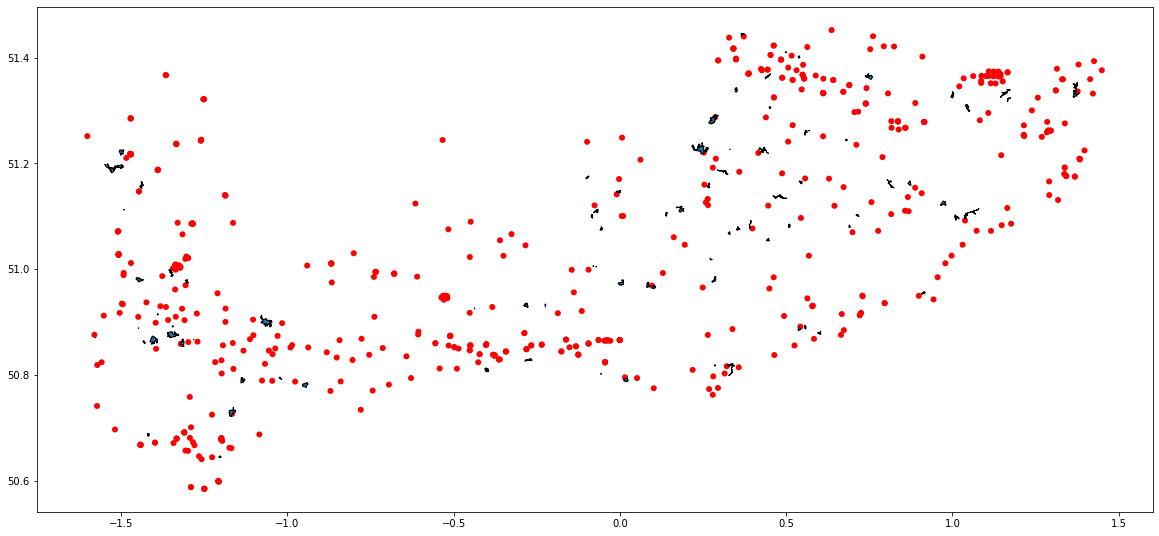

In [21]:
import matplotlib.pyplot as plt
from shapely import wkt
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plotting multi layers of optimized and hotspot 
fig,ax = plt.subplots(figsize=(20, 14), edgecolor='k')
#world.plot(ax=ax, color='white', edgecolor='black')
hotspot_gdf.plot(ax=ax, cmap='hsv', edgecolor='none', column='OBJECT_TYPE')
optimized_gdf.plot(ax=ax, edgecolor = 'black')

The POINTS from the 'hotspot_gdf' that fall within the POLYGONS from the 'optimized_gdf' can be recognised in the plot above as those points where the red points (representing hotspots) intersect the black polygons (representing catchments).

#### 5. A list of points inside polygons
-send me a list of STATION_NO Ids for all the sites identified in step 4.

The following pairs of coordinates were hand-picked by exploring the data on kepler.gl

1.   HSf1853941-a029-4cd2-bf85-6337b3a3446e- POINT (-1.321106 50.858857)

2.   HSfcaf96e2-db37-427a-bde4-c2d407153429- POINT (-1.166267 50.726717)

3.   HS0a4a592c-dbb3-4f11-a1d6-68920a910e92- POINT (0.286555 51.287484)

4.   HS0446ab5b-5462-44c9-a216-b0a0850191d3- POINT (0.252288 51.2206).

However, the code snippet below shows the distances between the POINTS and POLYGONS. Fair enough, the first four are the same points that were hand-picked.

The 'STATION_NO' with zeroes or close to zero-distances are the POINTS (pairs of coordinated) located within (intersecting) the POLYGONS.




In [22]:
# the nearest points to polygons
hotspot_intersect_optimized = gpd.sjoin_nearest(hotspot_shp, optimized_shp, distance_col="distances").sort_values('distances')
hotspot_intersect_optimized

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:348: UserWarning:

Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,STATION_LA_left,STATION_LO_left,OBJECT_TYP_left,OBJECT_T_1_left,CREATIONTI_left,geometry,index_right,STATION_LA_right,STATION_LO_right,OBJECT_TYP_right,OBJECT_T_1_right,CREATIONTI_right,distances
STATION_NO,,,,,,,,,,,,,
HS0446ab5b-5462-44c9-a216-b0a0850191d3,51.220600,0.252288,Hotspot,HS,2018-08-15 18:07:22.000,POINT (0.25229 51.22060),CM347c6d5d-2c35-4a5c-a498-e173661b37dd,51.227190,0.243767,Catchment,CM,2022-03-23 18:02:46.000,0.000000
HSf1853941-a029-4cd2-bf85-6337b3a3446e,50.858857,-1.321106,Hotspot,HS,2019-05-20 11:55:31.000,POINT (-1.32111 50.85886),CM2dc2b371-a0b5-4309-9a75-2a0e6d1e65ea,50.860208,-1.315635,Catchment,CM,2022-03-23 18:02:56.000,0.000000
HS0a4a592c-dbb3-4f11-a1d6-68920a910e92,51.287484,0.286555,Hotspot,HS,2019-05-23 15:08:46.000,POINT (0.28656 51.28748),CM11dfcd06-63ed-461a-8b29-9f9690a585c6,51.282425,0.279488,Catchment,CM,2022-03-23 18:02:39.000,0.000000
HSfcaf96e2-db37-427a-bde4-c2d407153429,50.726717,-1.166267,Hotspot,HS,2019-05-20 12:06:40.000,POINT (-1.16627 50.72672),CM544f9b06-efea-4c82-a81c-970ef99e9ecf,50.729125,-1.167573,Catchment,CM,2022-03-23 18:03:12.000,0.000001
HS1501cd6b-28fe-4eef-9146-84a5af0ed21e,50.968917,0.096087,Hotspot,HS,2019-05-22 16:53:38.000,POINT (0.09609 50.96892),CMb5c113d5-5c0d-478d-b150-b694d832dd9d,50.966091,0.101743,Catchment,CM,2022-03-23 18:02:55.000,0.001340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSd8c595ce-5bb2-4d32-8a17-efc5e9e6136a,50.995047,-0.735307,Hotspot,HS,2017-12-14 17:40:47.000,POINT (-0.73531 50.99505),CM35fa6eb1-d45f-437a-b2b3-da237d25777b,50.781136,-0.946738,Catchment,CM,2022-03-23 18:02:39.000,0.293368
HS25527b81-269f-43ed-848d-3c3c641cec9b,50.995039,-0.734594,Hotspot,HS,2017-12-14 17:40:46.000,POINT (-0.73459 50.99504),CM35fa6eb1-d45f-437a-b2b3-da237d25777b,50.781136,-0.946738,Catchment,CM,2022-03-23 18:02:39.000,0.293859
HSf2c1c70a-5088-4746-ac84-ae9ed6339a2c,50.995039,-0.734594,Hotspot,HS,2017-12-14 17:40:46.000,POINT (-0.73459 50.99504),CM35fa6eb1-d45f-437a-b2b3-da237d25777b,50.781136,-0.946738,Catchment,CM,2022-03-23 18:02:39.000,0.293859


In [53]:
# csv file containg the 10 closest hotspots to catchments sent to our Mentors
#selected_10_sites.to_csv('selected_10_sites.csv', index=True)

#### **Coordinate reference systems** (CRS)
These are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth. 

A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

*Buffer* is a GeoPandas helper function that expands a point to a circle-like polygon. Buffer is used on a geodataframe series (column) to create a polygon around a line or point.

In [23]:
# Reprojecting the optimised_shp into a projected crs (coordinate reference system)
optimized_projected = optimized_shp.to_crs(epsg=9387)

# use a buffer of 500m for projected crs
optimized_shp['buffer_projpoly'] = optimized_projected['geometry'].buffer(distance=500)
optimized_shp['centroid'] = optimized_shp.centroid

# create the area and boundary features in the optimized Geopandas Geodataframe
optimized_shp['area'] = optimized_shp.area
optimized_shp['boundary'] = optimized_shp.boundary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [24]:
print('Area of largest polygon in meters sq =',optimized_projected.area.max())
print('Area of smallest polygon in meters sq =',optimized_projected.area.min())
print('Average area of polygon in meters sq =',optimized_projected.area.mean())

Area of largest polygon in meters sq = 2173558.6336592278
Area of smallest polygon in meters sq = 3390.2028147169035
Average area of polygon in meters sq = 299983.6605497008


#### Let's see the difference in the 3 maps

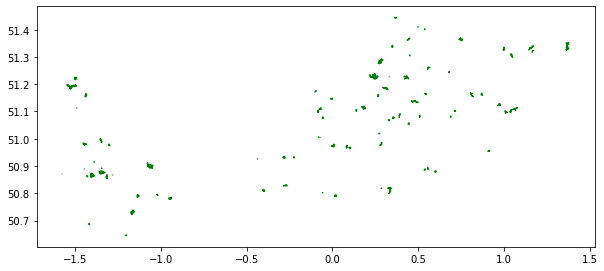

In [28]:
# Data points in decimal degrees
optimized_gdf.plot(edgecolor='green', figsize= (10,7))

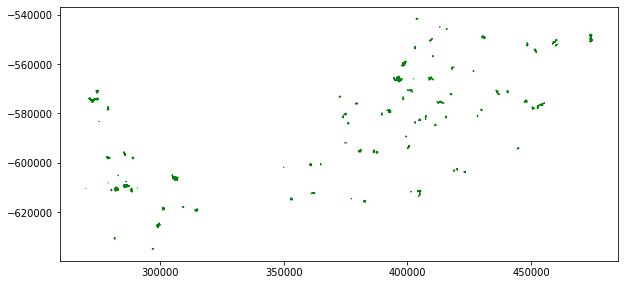

In [29]:
# Data points in projected coordinate system (meter)
optimized_projected.plot(edgecolor='green', figsize= (10,7))

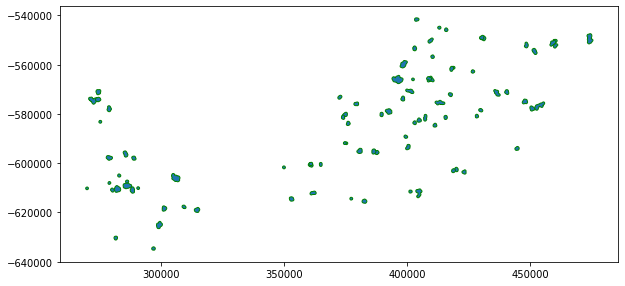

In [31]:
# Data points with the buffer (distance of 500m around the point)
projected_geometry = optimized_projected['geometry'].buffer(distance=500)
projected_geometry.plot(edgecolor='green', figsize=(10, 7))